**Time Sensitive Deal Prediction**

Step 1:
View data overview

In [1]:
import pandas as pd
df = pd.read_csv("ScrappedData.2025_04_02_Coles.csv")
df.head()

,_id,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,price_was,special_text,promo_text,link
0,67ed14d6a8bdc17e3ddceed5,8371390,Easter,Coles Hot Cross Buns Traditional Fruit | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
1,67ed14d6a8bdc17e3ddceed6,7473849,Easter,Coles Hot Cross Buns Choc Chip | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
2,67ed14d6a8bdc17e3ddceed7,5726070,Easter,Coles Hot Cross Buns Traditional Fruit Mini | ...,$3.0,$0.49 per 1ea,$4.40,$0.49 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...
3,67ed14d6a8bdc17e3ddceed9,4885191,Easter,Cadbury Dairy Milk Easter Chocolate Eggs Bag |...,$6.70,$5.88 per 100g,$6.70,$5.88 per 100g,NaN,NaN,NaN,https://www.coles.com.au/product/cadbury-dairy...
4,67ed14d6a8bdc17e3ddceedb,3378370,Easter,Coles Hot Cross Buns Apple & Cinnamon | 6 Pack,$3.0,$0.73 per 1ea,$4.40,$0.73 per 1ea,NaN,SPECIAL,2 for $6,https://www.coles.com.au/product/coles-hot-cro...


In [2]:
df.shape

(140, 12)

In [3]:
df.dtypes  

_id                object
product_code        int64
category           object
item_name          object
best_price         object
best_unit_price    object
item_price         object
unit_price         object
price_was          object
special_text       object
promo_text         object
link               object
dtype: object

Step 2 :
1. Get a list of all files
2. Define a date extraction function
3. Merge all files and add a timestamp


In [4]:
import glob
import re
from datetime import datetime

files = glob.glob('ScrappedData.*_Coles*.csv')

def extract_date(filename):
    match = re.search(r'(\d{4})_(\d{2})_(\d{2})', filename)
    return datetime.strptime(f"{match.group(1)}-{match.group(2)}-{match.group(3)}", "%Y-%m-%d")

all_data = []
for file in files:
    try:
        df = pd.read_csv(file, encoding_errors='ignore')
        df['scrape_date'] = extract_date(file)
        all_data.append(df)
        print(f"Merged: {file}")
    except Exception as e:
        print(f"Skipped {file} (Error: {str(e)})")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv('Coles_ScrappedData.csv', index=False)
    print(f"\nMerge complete! Total records: {len(final_df)}")
    print("Date range:", final_df['scrape_date'].min(), "to", final_df['scrape_date'].max())
else:
    print("No files found to merge")

Merged: ScrappedData.2025_05_02_Coles.csv
Merged: ScrappedData.2025_04_10_Coles.csv
Merged: ScrappedData.2025_04_09_Coles.csv
Merged: ScrappedData.2025_04_02_Coles.csv
Merged: ScrappedData.2025_04_08_Coles.csv
Merged: ScrappedData.2025_04_17_Coles.csv
Merged: ScrappedData.2025_04_03_Coles.csv
Merged: ScrappedData.2025_05_08_Coles.csv

Merge complete! Total records: 134575
Date range: 2025-04-02 00:00:00 to 2025-05-08 00:00:00


In [5]:
df1 = pd.read_csv("Coles_ScrappedData.csv")
df1.head()


/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,_id,product_code,category,item_name,best_price,item_price,unit_price,special_text,promo_text,link,scrape_date,best_unit_price,price_was
0,6814c4d417c769501d9c2dd4,5900530,AVOCADO & MANGO,Hass Avocados,2.9,0.0,$2.90 per 1ea,Buy 2 for $5,MULTI_SAVE,https://www.coles.com.au/product/5900530,2025-05-02,NaN,NaN
1,6814c4d417c769501d9c2dd5,2903827,SNACKS,Favva Beans Sea Salt & Vinegar 6 Pack,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2903827,2025-05-02,NaN,NaN
2,6814c4d417c769501d9c2dd6,2508040,SNACKS,Kids Fav-va Beans Pizza,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2508040,2025-05-02,NaN,NaN
3,6814c4d417c769501d9c2dd7,1170130,CEREAL,Liquid Breakfast Vanilla Ice 12 x 250ml,17.5,0.0,$5.83 per 1L,NaN,NaN,https://www.coles.com.au/product/1170130,2025-05-02,NaN,NaN
4,6814c4d417c769501d9c2dd8,3865290,SNACKS,Roasted Chickpeas Dark Choc 5 Pack,6.0,0.0,$6.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3865290,2025-05-02,NaN,NaN


Step3 :  Clean new dataset

In [6]:
df = pd.read_csv("Coles_ScrappedData.csv")

new_column_order = [
    'scrape_date',   
    '_id',
    'product_code',
    'category',
    'item_name',
    'best_price',
    'item_price',
    'unit_price',
    'special_text',
    'promo_text',
    'link'         
]

columns_to_drop = ['best_unit_price', 'price_was']
df_cleaned = df.drop(columns=columns_to_drop)
df_reordered = df_cleaned[new_column_order]
df_reordered.to_csv("Coles_ScrappedData_Cleaned.csv", index=False)

print(f"Original columns: {df.columns.tolist()}")
print(f"New column order: {new_column_order}")

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Original columns: ['_id', 'product_code', 'category', 'item_name', 'best_price', 'item_price', 'unit_price', 'special_text', 'promo_text', 'link', 'scrape_date', 'best_unit_price', 'price_was']
New column order: ['scrape_date', '_id', 'product_code', 'category', 'item_name', 'best_price', 'item_price', 'unit_price', 'special_text', 'promo_text', 'link']


In [7]:
df2 = pd.read_csv("Coles_ScrappedData_Cleaned.csv")
df2.head()

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,scrape_date,_id,product_code,category,item_name,best_price,item_price,unit_price,special_text,promo_text,link
0,2025-05-02,6814c4d417c769501d9c2dd4,5900530,AVOCADO & MANGO,Hass Avocados,2.9,0.0,$2.90 per 1ea,Buy 2 for $5,MULTI_SAVE,https://www.coles.com.au/product/5900530
1,2025-05-02,6814c4d417c769501d9c2dd5,2903827,SNACKS,Favva Beans Sea Salt & Vinegar 6 Pack,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2903827
2,2025-05-02,6814c4d417c769501d9c2dd6,2508040,SNACKS,Kids Fav-va Beans Pizza,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2508040
3,2025-05-02,6814c4d417c769501d9c2dd7,1170130,CEREAL,Liquid Breakfast Vanilla Ice 12 x 250ml,17.5,0.0,$5.83 per 1L,NaN,NaN,https://www.coles.com.au/product/1170130
4,2025-05-02,6814c4d417c769501d9c2dd8,3865290,SNACKS,Roasted Chickpeas Dark Choc 5 Pack,6.0,0.0,$6.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3865290


Unit normalization function:
1. Converts per 1kg to per 100g
2. Converts per 1L to per 100ml
3. Ignores null values and non-string values

In [8]:
df = pd.read_csv("Coles_ScrappedData_Cleaned.csv")

def standardize_units(text):
    if pd.isna(text) or not isinstance(text, str):
        return text
    
    price_match = re.search(r'\$([\d.]+)', text.replace(',', ''))  # Remove thousand separators
    if not price_match:
        return text
    
    price = float(price_match.group(1))
    unit_part = text.lower().split('per')[-1].strip() if 'per' in text.lower() else ''

    if re.search(r'1\s?kg', unit_part):
        return f"${price/10:.3f} per 100g"
    elif re.search(r'1\s?l', unit_part):
        return f"${price/10:.3f} per 100ml"
    return text

df['unit_price'] = df['unit_price'].apply(standardize_units)

df.to_csv("Coles_ScrappedData1.csv", index=False)

print(f"Total rows: {len(df)}")

converted_mask = df['unit_price'].str.contains(r'per 100g|per 100ml', na=False)
print(f"Rows converted: {converted_mask.sum()}")



/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Total rows: 134575
Rows converted: 87796


In [9]:
df.head(10)

,scrape_date,_id,product_code,category,item_name,best_price,item_price,unit_price,special_text,promo_text,link
0,2025-05-02,6814c4d417c769501d9c2dd4,5900530,AVOCADO & MANGO,Hass Avocados,2.9,0.0,$2.90 per 1ea,Buy 2 for $5,MULTI_SAVE,https://www.coles.com.au/product/5900530
1,2025-05-02,6814c4d417c769501d9c2dd5,2903827,SNACKS,Favva Beans Sea Salt & Vinegar 6 Pack,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2903827
2,2025-05-02,6814c4d417c769501d9c2dd6,2508040,SNACKS,Kids Fav-va Beans Pizza,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2508040
3,2025-05-02,6814c4d417c769501d9c2dd7,1170130,CEREAL,Liquid Breakfast Vanilla Ice 12 x 250ml,17.5,0.0,$0.583 per 100ml,NaN,NaN,https://www.coles.com.au/product/1170130
4,2025-05-02,6814c4d417c769501d9c2dd8,3865290,SNACKS,Roasted Chickpeas Dark Choc 5 Pack,6.0,0.0,$6.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3865290
5,2025-05-02,6814c4d417c769501d9c2dd9,3554100,SNACKS,Chocolate Roasted Chickpeas 5 Pack,6.0,0.0,$6.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3554100
6,2025-05-02,6814c4d417c769501d9c2dda,1469510,SNACKS,Lightly Salted Crunchy Roasted Chickpeas,6.0,0.0,$3.00 per 100g,NaN,NaN,https://www.coles.com.au/product/1469510
7,2025-05-02,6814c4d417c769501d9c2ddb,2903816,SNACKS,Favva Beans Red Pepper & Chilli 6 Pack,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2903816
8,2025-05-02,6814c4d417c769501d9c2ddc,8951356,CEREAL,Liquid Breakfast Choc Ice 12 x 250ml,17.5,0.0,$0.583 per 100ml,NaN,NaN,https://www.coles.com.au/product/8951356
9,2025-05-02,6814c4d417c769501d9c2ddd,3015296,SNACKS,Chickpeas Lightly Salted,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3015296


In [3]:
import pandas as pd

df = pd.read_csv('Coles_ScrappedData_Cleaned.csv')
unique_categories = df['category'].unique()

print("All category tags：")
for category in unique_categories:
    print(f"- {category}")

All category tags：
- AVOCADO & MANGO
- SNACKS
- CEREAL
- CONFECTIONERY
- CHILLED DESSERTS
- MEALS
- BAKERY PACKAGED CAKE
- VITAMINS
- NUTRITIONAL SNACKS
- KITCHEN NEEDS/BAGS
- FROZEN WORLD FOODS
- DRIED FRUIT/NUTS
- WOMENS DEOS & GROOM
- MELONS & TROPICAL
- CHEESE DAIRY
- BISCUITS & COOKIES
- CHILLED HEALTHFOODS
- BAKERY SNACKS
- VALUE ADDED FP
- BEEF
- SMALLGOODS DY
- RICE
- SOUP
- ENTERTAINMENT
- PROTEIN & MEALS
- FROZEN VEGETABLES
- BEAUTY/TRIAL TRAVEL
- MEAL BASES
- SPREADS
- CHILLED SPREADS
- MEDICINAL PRODUCTS
- SKIN CARE
- STATIONERY
- FRUIT-SHELF STABLE
- BERRIES & CHERRIES
- CITRUS
- CANNED FISH
- MENS DEOS & GROOMING
- PORK
- SAUSAGES
- HOMEWARES
- TECH ACCESSORIES
- MEXICAN FOODS
- PASTA
- VALUE ADDED
- SLICED MEATS
- CANNED MEALS
- WATER
- FROZEN SNACKS
- SANITARY PROTECTION
- INFANT PERSONAL
- ICE CREAM
- FACIAL TISSUES
- BARS GUM POCKET PACK
- GROCERY MILK
- SAUCES/RELISH
- INSTANT NOODLES
- HEALTH FOODS
- JUICES & CORDIALS
- INDIAN FOODS
- LAMB
- SOAPS & BODY WASH
- NUTS

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_discount = pd.read_csv('Mouth_Discounts.csv')
category_mapping = {
    # Meat & Seafood 
    'Meat & Seafood': [
        'BEEF', 'PORK', 'LAMB', 'POULTRY (MT)', 'POULTRY (DL)', 'GAME', 
        'HAM', 'SAUSAGES', 'SMALLGOODS', 'SMALLGOODS DY', 'ORGANIC MEAT',
        'SEAFOOD DELI', 'PREPACKAGED SEAFOOD', 'SMOKED & CURED FISH',
        'FROZEN SEAFOOD', 'CANNED FISH'
    ],
    
    # Fruit & Vegetables 
    'Fruit & Vegetables': [
        'AVOCADO & MANGO', 'MELONS & TROPICAL', 'BERRIES & CHERRIES',
        'CITRUS', 'APPLES & PEARS', 'BANANAS', 'GRAPES', 'STONE FRUIT',
        'VALUE ADDED FP', 'VINE VEGETABLES', 'SOFT VEGETABLES', 'TOMATOES',
        'BUNCH LINES', 'HARD VEGETABLES', 'POTATOES', 'MUSHROOMS',
        'HERBS & CHILLIES', 'ORGANIC FRUIT & VEG', 'FROZEN VEGETABLES',
        'CANNED VEG', 'PICKLED VEGETABLES', 'DRIED FRUIT/NUTS', 'NUTS/DRIED',
        'FRUIT-SHELF STABLE', 'GARDEN NON GREENS'
    ],
    
    # Dairy, Eggs & Fridge 
    'Dairy, Eggs & Fridge': [
        'CHEESE DAIRY', 'GOURMET CHEESE', 'SPEC/FRESH CHEESE', 'EGGS',
        'DY MILK', 'GROCERY MILK', 'CHILLED DESSERTS', 'CHILLED SPREADS',
        'CHILLED HEALTHFOODS', 'DL PREPARED FOODS', 'MILK ADDITIVES',
        'DAIRY WORLD FOODS'
    ],
    
    # Bakery 
    'Bakery': [
        'INSTORE BREAD', 'BAKERY BOUGHT IN', 'BREAD ROLLS & FBREAD',
        'BAKERY PACKAGED CAKE', 'INSTORE CAKE', 'BAKERY SNACKS',
        'PIES AND QUICHES', 'BAKERY EASTER', 'BH BOUGHT IN EASTER'
    ],
    
    # Deli 
    'Deli': [
        'SLICED MEATS', 'ANTIP/OLIVE/DIP/PATE', 'VALUE ADDED',
        'CONVENIENCE MEALS', 'BBQ', 'GRAB & GO'
    ],
    
    # Pantry
    'Pantry': [
        'CEREAL', 'BISCUITS & COOKIES', 'RICE', 'PASTA', 'SOUP', 'SPREADS',
        'SAUCES/RELISH', 'SALAD DRESSINGS', 'GRAVY/STOCK', 'VINEGAR', 'OILS',
        'SPICES/HERBS', 'INSTANT NOODLES', 'MEAL BASES', 'BAKING MIXES',
        'FLOUR', 'SUGAR/SWEETENERS', 'COFFEE', 'TEA', 'CANNED MEALS',
        'INTERNATIONAL FOODS', 'ASIAN FOODS', 'MEXICAN FOODS', 'INDIAN FOODS',
        'CONTINENTAL', 'FROZEN WORLD FOODS'
    ],
    
    # Chips, Chocolates & Snacks
    'Chips, Chocolates & Snacks': [
        'SNACKS', 'CONFECTIONERY', 'NUTRITIONAL SNACKS', 'BARS GUM POCKET PACK',
        'BOXED CHOCOLATES', 'FROZEN SNACKS', 'BETTER FOR YOU'
    ],
    
    # Drinks
    'Drinks': [
        'WATER', 'JUICES & CORDIALS', 'JUICES/DRINKS', 'SOFTDRINKS',
        'COLD DRINK', 'ENERGY/SPORT/ICEDTEA', 'WINE', 'BEER', 'SPIRITS',
        'LIQUOR RTD'
    ],
    
    # Frozen 
    'Frozen': [
        'FROZEN DESSERTS', 'ICE CREAM', 'FROZEN MEALS', 'FROZEN VEGETABLES',
        'FROZEN FRUITS', 'FROZEN PASTRY', 'FROZEN SEAFOOD', 'OTHER FROZEN'
    ],
    
    # Household 
    'Household': [
        'KITCHEN NEEDS/BAGS', 'STATIONERY', 'HOMEWARES', 'KITCHENWARE',
        'DISPOSABLE TABLEWARE', 'PEST CONTROL', 'AIRCARE', 'DISHWASHING',
        'LAUNDRY', 'LAUNDRY ACCESSORIES', 'CLEANING GOODS', 'PAPER TOWELS',
        'TOILET PAPER', 'FACIAL TISSUES', 'BRUSHWARE', 'HOUSEHOLD GLOVES',
        'HOUSEHOLD APPLIANCES', 'HEATING & COOLING', 'PICNIC POOL BBQ ACC',
        'PARTY GOODS', 'CARDS/WRAPS', 'SHOPPING BAGS'
    ],
    
    # Health & Beauty 
    'Health & Beauty': [
        'VITAMINS', 'MEDICINAL PRODUCTS', 'SKIN CARE', 'SOAPS & BODY WASH',
        'HAIR CARE', 'DENTAL HEALTH', 'DEODORANTS & BODY SPRAYS',
        'WOMENS DEOS & GROOM', 'MENS DEOS & GROOMING', 'COSMETICS/TOILETRIES',
        'SANITARY PROTECTION', 'FEMININE & INCONTINENCE CARE',
        'INFANT PERSONAL', 'INFANT NAPPIES', 'FIRST AID & WELLNESS',
        'BEAUTY/TRIAL TRAVEL', 'FITNESS/HEALTH'
    ],
    
    # Baby & Infant 
    'Baby & Infant': [
        'INFANT FOOD', 'INFANT FORMULA', 'BABYWEAR', 'INFANT NAPPIES'
    ],
    
    # Other Categories 
    'Other Categories': [
        'PET FOOD', 'FRESH PET FOOD DY', 'TOYS & HOBBIES', 'TELCO',
        'ELECTRICAL', 'HARDWARE', 'AUTO', 'LEISURE', 'HOSIERY',
        'FAMILY UNDERWEAR', 'FAMILY SOCKS', 'SEASONAL APPAREL',
        'TECH ACCESSORIES', 'MAGAZINES', 'ENTERTAINMENT',
        'SEASONAL EVENTS', 'EASTER', 'BACK TO SCHOOL', 'FOOTY\'S BACK',
        'BEST BUYS', 'ANCIL SERVICES', 'LBI MERCH', 'BONUS CREDIT PRODUCTS'
    ]
}

# Reverse the mapping and create a dictionary from secondary categories to primary categories
sub_to_main = {}
for main_category, sub_categories in category_mapping.items():
    for sub_category in sub_categories:
        sub_to_main[sub_category.upper()] = main_category

df_processed = df_discount.copy()

df_processed = df_processed.rename(columns={df_processed.columns[0]: 'subcategory'})

df_processed['main_category'] = df_processed['subcategory'].apply(
    lambda x: sub_to_main.get(x.upper(), 'Other Categories')
)

cols = ['main_category', 'subcategory'] + [col for col in df_processed.columns if col not in ['main_category', 'subcategory']]
df_processed = df_processed[cols]
df_processed.to_csv('Mouth_Discounts_With_Main_Category.csv', index=False)

print("Processing completed! New CSV file saved as 'Mouth_Discounts_With_Main_Category.csv'")
print(f"Total number of rows: {len(df_processed)}")
print(f"Number of main categories: {df_processed['main_category'].nunique()}")
print(f"Number of subcategories: {df_processed['subcategory'].nunique()}")



Processing completed! New CSV file saved as 'Mouth_Discounts_With_Main_Category.csv'
Total number of rows: 128
Number of main categories:: 9
Number of subcategories:: 128


In [5]:
df_scraped = pd.read_csv('Coles_ScrappedData_Cleaned.csv')

def standardize_category_name(name):
    
    if pd.isna(name):
        return 'Other Categories'
    name = name.upper().strip()
    name = name.replace('&', 'AND')
    name = name.replace('/', ' ')
    name = name.replace('-', ' ')
    return name

# Create a mapping from crawled data categories to main categories
scraped_to_main = {}
for scraped_category in df_scraped['category'].unique():
    if pd.isna(scraped_category):
        continue
    std_name = standardize_category_name(scraped_category)
    found = False
    for main_cat, sub_cats in category_mapping.items():
        for sub_cat in sub_cats:
            if std_name in standardize_category_name(sub_cat) or standardize_category_name(sub_cat) in std_name:
                scraped_to_main[scraped_category] = main_cat
                found = True
                break
        if found:
            break
    if not found:
        scraped_to_main[scraped_category] = 'Other Categories'

df_scraped_processed = df_scraped.copy()
df_scraped_processed['main_category'] = df_scraped_processed['category'].map(scraped_to_main)
df_scraped_processed = df_scraped_processed.rename(columns={'category': 'subcategory'})
scraped_cols = ['main_category', 'subcategory'] + [col for col in df_scraped_processed.columns if col not in ['main_category', 'subcategory']]
df_scraped_processed = df_scraped_processed[scraped_cols]
df_scraped_processed.to_csv('Coles1.csv', index=False)

In [6]:
df_coles = pd.read_csv('Coles1.csv')
df_coles['scrape_date'] = (
    pd.to_datetime(df_coles['scrape_date'], format='%Y-%m-%d', errors='coerce')
      .dt.strftime('%d-%m-%Y')
)
df_coles.head()

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,main_category,subcategory,scrape_date,_id,product_code,item_name,best_price,item_price,unit_price,special_text,promo_text,link
0,Fruit & Vegetables,AVOCADO & MANGO,02-05-2025,6814c4d417c769501d9c2dd4,5900530,Hass Avocados,2.9,0.0,$2.90 per 1ea,Buy 2 for $5,MULTI_SAVE,https://www.coles.com.au/product/5900530
1,Bakery,SNACKS,02-05-2025,6814c4d417c769501d9c2dd5,2903827,Favva Beans Sea Salt & Vinegar 6 Pack,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2903827
2,Bakery,SNACKS,02-05-2025,6814c4d417c769501d9c2dd6,2508040,Kids Fav-va Beans Pizza,6.0,0.0,$4.00 per 100g,NaN,NaN,https://www.coles.com.au/product/2508040
3,Pantry,CEREAL,02-05-2025,6814c4d417c769501d9c2dd7,1170130,Liquid Breakfast Vanilla Ice 12 x 250ml,17.5,0.0,$5.83 per 1L,NaN,NaN,https://www.coles.com.au/product/1170130
4,Bakery,SNACKS,02-05-2025,6814c4d417c769501d9c2dd8,3865290,Roasted Chickpeas Dark Choc 5 Pack,6.0,0.0,$6.00 per 100g,NaN,NaN,https://www.coles.com.au/product/3865290


In [7]:
import pandas as pd
import numpy as np

# Read CSV file
df = pd.read_csv('Coles1.csv')

# Display basic data information
print("Original data shape:", df.shape)
print("Column names:", df.columns.tolist())
print("\nFirst few rows of data:")
print(df.head())

# Check what columns actually exist in your DataFrame
available_columns = df.columns.tolist()
print(f"\nAvailable columns: {available_columns}")

# Check for duplicate data
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check which of the desired columns actually exist
desired_columns = ['main_category', 'subcategory', 'scrape_date', 'product_code', 'item_name']
existing_columns = [col for col in desired_columns if col in available_columns]

print(f"Columns found: {existing_columns}")
print(f"Columns not found: {set(desired_columns) - set(existing_columns)}")

# Clean duplicate data using only available columns
if existing_columns:
    cleaned_df = df.drop_duplicates(subset=existing_columns, keep='first')
    
    print(f"\nCleaned data shape: {cleaned_df.shape}")
    print(f"Number of duplicate rows removed: {len(df) - len(cleaned_df)}")
    
    # Save cleaned data
    cleaned_df.to_csv('Coles2.csv', index=False)
    print("\nData cleaning completed! Cleaned file saved as 'Coles2.csv'")
    
    # Optional: Display some statistical information
    print("\n=== Data Statistics ===")
    if 'scrape_date' in available_columns:
        print(f"Scraping date range: {cleaned_df['scrape_date'].min()} to {cleaned_df['scrape_date'].max()}")
    if 'main_category' in available_columns:
        print(f"Number of main categories: {cleaned_df['main_category'].nunique()}")
    if 'subcategory' in available_columns:
        print(f"Number of subcategories: {cleaned_df['subcategory'].nunique()}")
    if 'product_code' in available_columns:
        print(f"Number of unique products: {cleaned_df['product_code'].nunique()}")
    
    # Check if any duplicates remain
    remaining_duplicates = cleaned_df.duplicated(subset=existing_columns).sum()
    print(f"Remaining duplicate rows after cleaning: {remaining_duplicates}")
else:
    print("No matching columns found for duplicate removal. Using all columns.")
    cleaned_df = df.drop_duplicates(keep='first')
    cleaned_df.to_csv('Coles2.csv', index=False)
    print("File saved with general duplicate removal.")

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Original data shape: (134575, 12)
Column names: ['main_category', 'subcategory', 'scrape_date', '_id', 'product_code', 'item_name', 'best_price', 'item_price', 'unit_price', 'special_text', 'promo_text', 'link']

First few rows of data:
        main_category      subcategory scrape_date                       _id  \
0  Fruit & Vegetables  AVOCADO & MANGO  2025-05-02  6814c4d417c769501d9c2dd4   
1              Bakery           SNACKS  2025-05-02  6814c4d417c769501d9c2dd5   
2              Bakery           SNACKS  2025-05-02  6814c4d417c769501d9c2dd6   
3              Pantry           CEREAL  2025-05-02  6814c4d417c769501d9c2dd7   
4              Bakery           SNACKS  2025-05-02  6814c4d417c769501d9c2dd8   

   product_code                                item_name best_price  \
0       5900530                            Hass Avocados        2.9   
1       2903827    Favva Beans Sea Salt & Vinegar 6 Pack        6.0   
2       2508040                  Kids Fav-va Beans Pizza        6.0  

In [2]:

from datetime import datetime, timedelta
import holidays


df_coles = pd.read_csv('coles2.csv')
df_discount = pd.read_csv('Mouth_Discounts.csv')
print(f"Coles: {df_coles.shape}, Discount Table: {df_discount.shape}")

Coles: (59678, 12), Discount Table: (128, 29)


In [3]:
price_columns = ['item_price', 'best_price', 'unit_price']
for col in price_columns:
    if col in df_coles.columns:
        df_coles[col] = pd.to_numeric(df_coles[col], errors='coerce')

df_discount = df_discount.rename(columns={df_discount.columns[0]: 'subcategory'})

In [4]:
time_period_columns = []
for col in df_discount.columns[1:]:
    if '-' in col and len(col.split('-')) == 2:
        month_part, num_part = col.split('-')
        if month_part in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
            time_period_columns.append(col)


In [6]:
# AUS holiday
au_holidays = holidays.AU(years=[2024, 2025])

all_dates = pd.date_range(start='2024-01-01', end='2025-12-31', freq='D')
synthetic_data = []
for main_category in df_coles['main_category'].unique():
    print(f"Processing main categories: {main_category}")
    
    category_products = df_coles[df_coles['main_category'] == main_category]
    unique_products = category_products.drop_duplicates(subset=['product_code'])
    
    print(f"  -Quantity of products: {len(unique_products)}")

Processing main categories: Fruit & Vegetables
  -Quantity of products: 1289
Processing main categories: Bakery
  -Quantity of products: 1143
Processing main categories: Pantry
  -Quantity of products: 4795
Processing main categories: Chips, Chocolates & Snacks
  -Quantity of products: 1070
Processing main categories: Dairy, Eggs & Fridge
  -Quantity of products: 1803
Processing main categories: Deli
  -Quantity of products: 525
Processing main categories: Health & Beauty
  -Quantity of products: 4761
Processing main categories: Household
  -Quantity of products: 2167
Processing main categories: Meat & Seafood
  -Quantity of products: 975
Processing main categories: Other Categories
  -Quantity of products: 2147
Processing main categories: Drinks
  -Quantity of products: 1315
Processing main categories: Frozen
  -Quantity of products: 420
Processing main categories: Baby & Infant
  -Quantity of products: 315


In [7]:
def get_base_discount(date, discount_pattern):
    year, month = date.year, date.month
    
    if (year, month) in discount_pattern:
        return discount_pattern[(year, month)]
    
    available_months = list(discount_pattern.keys())
    if available_months:
        
        closest_month = min(available_months, key=lambda x: abs((x[0] - year) * 12 + (x[1] - month)))
        return discount_pattern[closest_month]

    return 0.15  # 15% default discount

def get_base_price(product_row):

    price_columns = ['item_price', 'best_price', 'unit_price']
    
    for col in price_columns:
        if col in product_row and pd.notna(product_row[col]):
            try:
                price = float(product_row[col])
                if price > 0:
                    return price
            except (ValueError, TypeError):
                continue

In [8]:
def get_discount_pattern(subcategory, discount_df, time_cols):

    pattern = {}
    
    # Find discount data for this subcategory
    discount_data = discount_df[discount_df['subcategory'].str.upper() == subcategory.upper()]
    
    if not discount_data.empty:
        discount_row = discount_data.iloc[0]
        for col in time_cols:
            discount_value = discount_row[col]
            if pd.notna(discount_value):
                try:
                    month_str, year_suffix = col.split('-')
                    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
                    
                    year = 2024 if year_suffix == '01' else 2025
                    discount_rate = process_discount_value(discount_value)
                    
                    pattern[(year, month_map[month_str])] = discount_rate
                    
                except Exception as e:
                    continue
    
    return pattern

In [9]:
def generate_subcategory_synthetic_data(products, discount_pattern, all_dates, holidays):
    batch_data = []
    num_products = len(products)
    
    if num_products == 0:
        return batch_data
    
    discount_coverage = 0.15  
    
    for date in all_dates:
        
        base_discount = get_base_discount(date, discount_pattern)
        discount_mask = np.random.random(num_products) < discount_coverage
        
        for i, (_, product_row) in enumerate(products.iterrows()):
            base_price = get_base_price(product_row)

            if base_price is None or base_price <= 0:
                base_price = 12.
                
            if discount_mask[i]:
                final_price = calculate_discounted_price(base_price, base_discount, date, holidays)
                discount_rate = (base_price - final_price) / base_price
            else:
                price_variation = np.random.normal(0, 0.02)
                final_price = base_price * (1 + price_variation)
                discount_rate = 0
            
            final_price = max(0.1, min(final_price, base_price * 2)) 
            
            record = create_synthetic_record(product_row, date, final_price, base_price, discount_rate)
            batch_data.append(record)
    
    return batch_data

In [10]:
def calculate_discounted_price(base_price, base_discount, date, holidays):
    days_from_month_mid = abs((date.day - 15))
    decay_factor = np.exp(-days_from_month_mid / 10)
    
    #Special Date
    weekend_factor = 0.98 if date.weekday() >= 5 else 1.0
    holiday_factor = 0.95 if date in holidays else 1.0
    seasonal_factor = get_seasonal_factor(date)
    final_discount = base_discount * decay_factor * weekend_factor * holiday_factor * seasonal_factor
    final_discount = min(max(final_discount, 0), 0.6)  # 
    
    # Add random noise
    noise = np.random.normal(0, 0.03)
    final_discount = final_discount * (1 + noise)
    
    return base_price * (1 - final_discount)

def get_seasonal_factor(date):
    month = date.month
    if month in [12, 1, 2]:  # Summer
        return 1.05
    elif month in [6, 7, 8]:  # Winter
        return 0.95
    else:
        return 1.0

In [11]:
def create_synthetic_record(product_row, date, final_price, base_price, discount_rate):
    return {
        'scrape_date': date.strftime('%d-%m-%Y'),
        'date_timestamp': date,
        'product_code': product_row['product_code'],
        'main_category': product_row['main_category'],
        'subcategory': product_row['subcategory'],
        'item_name': product_row['item_name'],
        'daily_price': round(final_price, 2),
        'base_price': round(base_price, 2),
        'discount_rate': round(discount_rate * 100, 2),
        'discount_amount': round(base_price - final_price, 2),
        'unit_price': product_row.get('unit_price', np.nan),
        'special_text': 'Synthetic Data' if discount_rate > 0 else '',
        'promo_text': f"{discount_rate*100:.0f}% off" if discount_rate > 0 else '',
        'link': product_row.get('link', ''),
        'is_generated': True,
        'original_scrape_date': product_row.get('scrape_date', '')
    }

In [ ]:

all_main_categories = [
    'Meat & Seafood', 'Fruit & Vegetables', 'Dairy, Eggs & Fridge', 'Bakery',
    'Deli', 'Pantry', 'Chips, Chocolates & Snacks', 'Drinks', 'Frozen',
    'Household', 'Health & Beauty', 'Baby & Infant', 'Other Categories'
]

all_synthetic_data = []


for main_category in all_main_categories:
    print(f" Processing main category: {main_category}")

    synthetic_data = []
    
    category_products = df_coles[df_coles['main_category'] == main_category]
    unique_products = category_products.drop_duplicates(subset=['product_code'])
    
    print(f"   Quantity of products: {len(unique_products)}")
    
    subcategories = category_products['subcategory'].unique()
    for subcategory in subcategories:
        print(f"   Processing subcategory: {subcategory}")
    
        discount_pattern = get_discount_pattern(subcategory, df_discount, time_period_columns)
        subcat_products = category_products[category_products['subcategory'] == subcategory]
        synthetic_batch = generate_subcategory_synthetic_data(
            subcat_products, discount_pattern, all_dates, au_holidays
        )
        
        synthetic_data.extend(synthetic_batch)
    
    category_df = pd.DataFrame(synthetic_data)
    output_filename = f'Coles_Synthetic_{main_category.replace(" ", "_").replace("&", "and")}.csv'
    category_df.to_csv(output_filename, index=False)
    
    print(f"  Saved {len(synthetic_data)} records for {main_category} to {output_filename}")
    
    all_synthetic_data.extend(synthetic_data)
    
    del synthetic_data, category_df
    import gc
    gc.collect()

print(" All categories processed successfully!")

 Processing main category: Meat & Seafood
   Quantity of products: 975
   Processing subcategory: BEEF
   Processing subcategory: SMALLGOODS DY
   Processing subcategory: CANNED FISH
   Processing subcategory: PORK
   Processing subcategory: SAUSAGES
   Processing subcategory: LAMB
   Processing subcategory: POULTRY (MT)
   Processing subcategory: SMOKED & CURED FISH
   Processing subcategory: FROZEN SEAFOOD
   Processing subcategory: POULTRY (DL)
   Processing subcategory: SMALLGOODS
   Processing subcategory: PREPACKAGED SEAFOOD
   Processing subcategory: SEAFOOD DELI
   Processing subcategory: GAME
   Processing subcategory: HAMS
   Processing subcategory: Deli
   Processing subcategory: Frozen
   Processing subcategory: ORGANIC MEAT
  Saved 1790950 records for Meat & Seafood to Coles_Synthetic_Meat_and_Seafood.csv
 Processing main category: Fruit & Vegetables
   Quantity of products: 1289
   Processing subcategory: AVOCADO & MANGO
   Processing subcategory: DRIED FRUIT/NUTS
   Proc

In [12]:

all_main_categories = [
    'Baby & Infant', 'Other Categories'
]

all_synthetic_data = []


for main_category in all_main_categories:
    print(f" Processing main category: {main_category}")

    synthetic_data = []
    
    category_products = df_coles[df_coles['main_category'] == main_category]
    unique_products = category_products.drop_duplicates(subset=['product_code'])
    
    print(f"   Quantity of products: {len(unique_products)}")
    
    subcategories = category_products['subcategory'].unique()
    for subcategory in subcategories:
        print(f"   Processing subcategory: {subcategory}")
    
        discount_pattern = get_discount_pattern(subcategory, df_discount, time_period_columns)
        subcat_products = category_products[category_products['subcategory'] == subcategory]
        synthetic_batch = generate_subcategory_synthetic_data(
            subcat_products, discount_pattern, all_dates, au_holidays
        )
        
        synthetic_data.extend(synthetic_batch)
    
    category_df = pd.DataFrame(synthetic_data)
    output_filename = f'Coles_Synthetic_{main_category.replace(" ", "_").replace("&", "and")}.csv'
    category_df.to_csv(output_filename, index=False)
    
    print(f"  Saved {len(synthetic_data)} records for {main_category} to {output_filename}")
    
    all_synthetic_data.extend(synthetic_data)
    
    del synthetic_data, category_df
    import gc
    gc.collect()

print(" All categories processed successfully!")

 Processing main category: Baby & Infant
   Quantity of products: 315
   Processing subcategory: INFANT FOOD
   Processing subcategory: INFANT FORMULA
   Processing subcategory: BABYWEAR
  Saved 673251 records for Baby & Infant to Coles_Synthetic_Baby_and_Infant.csv
 Processing main category: Other Categories
   Quantity of products: 2147
   Processing subcategory: ENTERTAINMENT
   Processing subcategory: PROTEIN & MEALS
   Processing subcategory: TECH ACCESSORIES
   Processing subcategory: HEALTH FOODS
   Processing subcategory: FAMILY SOCKS
   Processing subcategory: SHOE CARE
   Processing subcategory: HARDWARE
   Processing subcategory: DESSERTS (GR)
   Processing subcategory: FRESH PET FOOD DY
   Processing subcategory: ELECTRICAL
   Processing subcategory: TOYS & HOBBIES
   Processing subcategory: TELCO
   Processing subcategory: AUTO
   Processing subcategory: BEST BUYS
   Processing subcategory: SEASONAL EVENTS
   Processing subcategory: ANCIL SERVICES
   Processing subcategory

In [13]:

all_main_categories = [
'Health & Beauty'
]

all_synthetic_data = []


for main_category in all_main_categories:
    print(f" Processing main category: {main_category}")

    synthetic_data = []
    
    category_products = df_coles[df_coles['main_category'] == main_category]
    unique_products = category_products.drop_duplicates(subset=['product_code'])
    
    print(f"   Quantity of products: {len(unique_products)}")
    
    subcategories = category_products['subcategory'].unique()
    for subcategory in subcategories:
        print(f"   Processing subcategory: {subcategory}")
    
        discount_pattern = get_discount_pattern(subcategory, df_discount, time_period_columns)
        subcat_products = category_products[category_products['subcategory'] == subcategory]
        synthetic_batch = generate_subcategory_synthetic_data(
            subcat_products, discount_pattern, all_dates, au_holidays
        )
        
        synthetic_data.extend(synthetic_batch)
    
    category_df = pd.DataFrame(synthetic_data)
    output_filename = f'Coles_Synthetic_{main_category.replace(" ", "_").replace("&", "and")}.csv'
    category_df.to_csv(output_filename, index=False)
    
    print(f"  Saved {len(synthetic_data)} records for {main_category} to {output_filename}")
    
    all_synthetic_data.extend(synthetic_data)
    
    del synthetic_data, category_df
    import gc
    gc.collect()

print(" All categories processed successfully!")

 Processing main category: Health & Beauty
   Quantity of products: 4761
   Processing subcategory: VITAMINS
   Processing subcategory: WOMENS DEOS & GROOM
   Processing subcategory: BEAUTY/TRIAL TRAVEL
   Processing subcategory: MEDICINAL PRODUCTS
   Processing subcategory: SKIN CARE
   Processing subcategory: MENS DEOS & GROOMING
   Processing subcategory: SANITARY PROTECTION
   Processing subcategory: INFANT PERSONAL
   Processing subcategory: SOAPS & BODY WASH
   Processing subcategory: HAIR CARE
   Processing subcategory: COSMETICS/TOILETRIES
   Processing subcategory: DENTAL HEALTH
   Processing subcategory: INFANT NAPPIES
   Processing subcategory: FITNESS/HEALTH
  Saved 9658703 records for Health & Beauty to Coles_Synthetic_Health_and_Beauty.csv
 All categories processed successfully!


In [17]:
import os

def combine_all_category_files():
    all_main_categories = [
        'Meat & Seafood', 'Fruit & Vegetables', 'Dairy, Eggs & Fridge', 'Bakery',
        'Deli', 'Pantry', 'Chips, Chocolates & Snacks', 'Drinks', 'Frozen',
        'Household', 'Health & Beauty', 'Baby & Infant', 'Other Categories'
    ]
    synthetic_files = []
    for main_category in all_main_categories:
        filename = f'Coles_Synthetic_{main_category.replace(" ", "_").replace("&", "and")}.csv'
        if os.path.exists(filename):
            synthetic_files.append(filename)

    chunk_size = 1000000 
    first_file = True
    
    for file in synthetic_files:
        print(f"Combining {file}...")
        for chunk in pd.read_csv(file, chunksize=chunk_size):
            if first_file:
                chunk.to_csv('Coles_Synthetic_Complete.csv', index=False)
                first_file = False
            else:
                chunk.to_csv('Coles_Synthetic_Complete.csv', mode='a', header=False, index=False)
    
    print("All files combined successfully!")

combine_all_category_files()

Combining Coles_Synthetic_Meat_and_Seafood.csv...
Combining Coles_Synthetic_Fruit_and_Vegetables.csv...
Combining Coles_Synthetic_Dairy,_Eggs_and_Fridge.csv...
Combining Coles_Synthetic_Bakery.csv...
Combining Coles_Synthetic_Deli.csv...
Combining Coles_Synthetic_Pantry.csv...
Combining Coles_Synthetic_Chips,_Chocolates_and_Snacks.csv...
Combining Coles_Synthetic_Drinks.csv...
Combining Coles_Synthetic_Frozen.csv...
Combining Coles_Synthetic_Household.csv...
Combining Coles_Synthetic_Health_and_Beauty.csv...
Combining Coles_Synthetic_Baby_and_Infant.csv...
Combining Coles_Synthetic_Other_Categories.csv...
All files combined successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import dask.dataframe as dd


In [9]:
ddf = dd.read_csv('Coles_Synthetic_Complete.csv')
print("📊 DATASET OVERVIEW")
print("=" * 60)
print(f"Total records: {ddf.shape[0].compute():,}")
print(f"Number of columns: {len(ddf.columns)}")
print(f"Time period: {ddf['scrape_date'].min().compute()} to {ddf['scrape_date'].max().compute()}")
print(f"Unique products: {ddf['product_code'].nunique().compute():,}")
print(f"Main categories: {ddf['main_category'].nunique().compute()}")
print(f"Subcategories: {ddf['subcategory'].nunique().compute()}")

📊 DATASET OVERVIEW
Total records: 43,624,618
Number of columns: 16
Time period: 01-01-2024 to 31-12-2025
Unique products: 22,375
Main categories: 13
Subcategories: 193


In [5]:
# Price statistics
price_stats = ddf['daily_price'].describe().compute()
print("Price Statistics:")
print(f"Mean price: ${price_stats['mean']:.2f}")
print(f"Median price: ${price_stats['50%']:.2f}")
print(f"Standard deviation: ${price_stats['std']:.2f}")
print(f"Price range: ${price_stats['min']:.2f} - ${price_stats['max']:.2f}")

Price Statistics:
Mean price: $10.95
Median price: $9.52
Standard deviation: $16.32
Price range: $0.24 - $1067.28


In [6]:
discount_stats = ddf['discount_rate'].describe().compute()
print(f"\nDiscount Statistics:")
print(f"Mean discount: {discount_stats['mean']:.1f}%")
print(f"Products with discount: {(ddf['discount_rate'] > 0).mean().compute() * 100:.1f}%")
print(f"Max discount: {discount_stats['max']:.1f}%")


Discount Statistics:
Mean discount: 1.1%
Products with discount: 15.0%
Max discount: 17.8%


In [7]:
# Data quality check
print(f"\nData Quality:")
print(f"Missing values in price: {ddf['daily_price'].isnull().sum().compute()}")
print(f"Zero or negative prices: {(ddf['daily_price'] <= 0).sum().compute()}")


Data Quality:
Missing values in price: 0
Zero or negative prices: 0


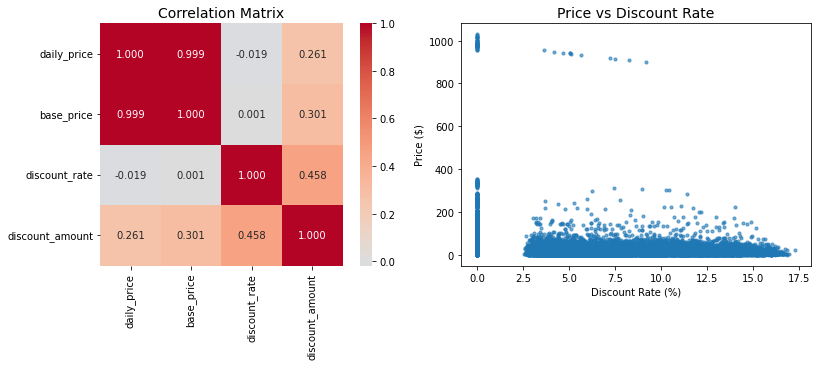

In [27]:
# Sample data for correlation analysis
sample_data = ddf_24_25.sample(frac=0.01).compute()  # 1% sample

# Correlation matrix
correlation_matrix = sample_data[['daily_price', 'base_price', 'discount_rate', 'discount_amount']].corr()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f', square=True)
plt.title('Correlation Matrix', fontsize=14)

# Scatter plot: Price vs Discount
plt.subplot(1, 2, 2)
plt.scatter(sample_data['discount_rate'], sample_data['daily_price'], alpha=0.6, s=10)
plt.title('Price vs Discount Rate', fontsize=14)
plt.xlabel('Discount Rate (%)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


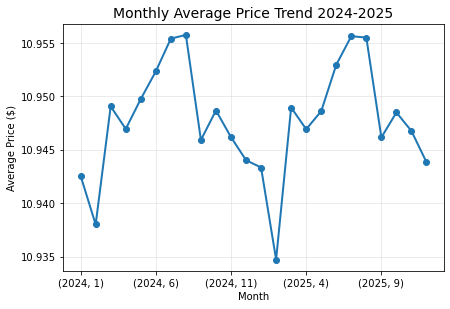

In [13]:
# Convert date columns for time analysis
ddf['date'] = dd.to_datetime(ddf['scrape_date'], format='%d-%m-%Y')
ddf['year'] = ddf['date'].dt.year
ddf['month'] = ddf['date'].dt.month
ddf['quarter'] = ddf['date'].dt.quarter
ddf['day_of_week'] = ddf['date'].dt.dayofweek

# Monthly price trend
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
monthly_trend['daily_price'].plot(marker='o', linewidth=2)
plt.title('Monthly Average Price Trend 2024-2025', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.grid(True, alpha=0.3)

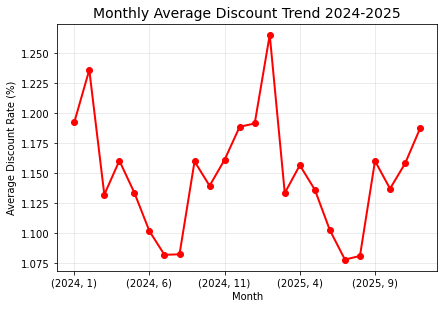

In [18]:
# Monthly discount trend
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
monthly_trend['discount_rate'].plot(marker='o', color='red', linewidth=2)
plt.title('Monthly Average Discount Trend 2024-2025', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Discount Rate (%)')
plt.grid(True, alpha=0.3)

In [22]:
def get_season(month):
    if month in [12, 1, 2]: return 'Summer'
    elif month in [3, 4, 5]: return 'Autumn'
    elif month in [6, 7, 8]: return 'Winter'
    else: return 'Spring'

# Apply season function
season_series = ddf_24_25['month'].apply(get_season, meta=('season', 'str'))
ddf_24_25 = ddf_24_25.assign(season=season_series)

# Seasonal statistics
seasonal_stats = ddf_24_25.groupby('season').agg({
    'daily_price': 'mean',
    'discount_rate': 'mean'
}).compute()

# Get unique products per season separately
seasonal_products = ddf_24_25.groupby('season')['product_code'].nunique().compute()
seasonal_stats['unique_products'] = seasonal_products

print("Seasonal Statistics:")
print(seasonal_stats.round(2))



Seasonal Statistics:
        daily_price  discount_rate  unique_products
season                                             
Autumn        10.95           1.14            22375
Spring        10.95           1.15            22375
Summer        10.94           1.21            22375
Winter        10.95           1.09            22375


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('Coles_Synthetic_Complete.csv')
df['date'] = pd.to_datetime(df['scrape_date'], format='%d-%m-%Y')
target_category = 'Fruit & Vegetables'
category_data = df[df['main_category'] == target_category]
print(f"\nAnalyzing category: {target_category}")
print(f"Records in category: {len(category_data):,}")


Analyzing category: Fruit & Vegetables
Records in category: 2,378,674


In [4]:
daily_prices = category_data.groupby('date')['daily_price'].mean().reset_index()
daily_prices = daily_prices.set_index('date')

print(f"Daily time series length: {len(daily_prices)}")

Daily time series length: 731


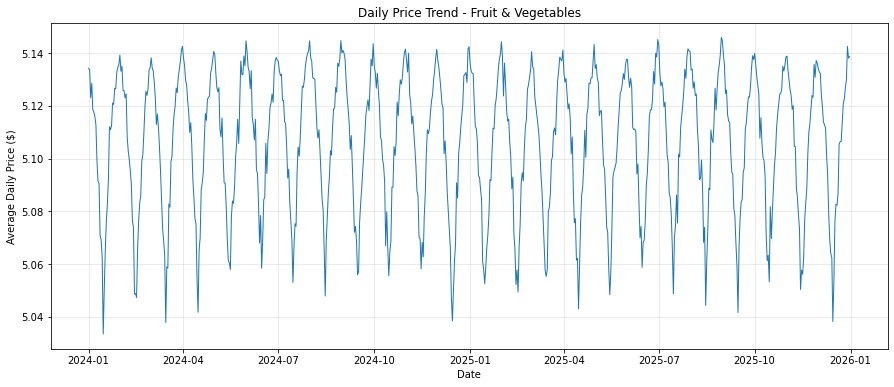

Missing values: daily_price    0
dtype: int64


In [5]:
plt.figure(figsize=(15, 6))
plt.plot(daily_prices.index, daily_prices['daily_price'], linewidth=1)
plt.title(f'Daily Price Trend - {target_category}')
plt.xlabel('Date')
plt.ylabel('Average Daily Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Missing values: {daily_prices.isnull().sum()}")
daily_prices = daily_prices.dropna()

Test Statistic                -1.196817e+01
p-value                        3.955338e-22
#Lags Used                     2.000000e+01
Number of Observations Used    7.100000e+02
Critical Value (1%)           -3.439594e+00
Critical Value (5%)           -2.865619e+00
Critical Value (10%)          -2.568942e+00
dtype: float64


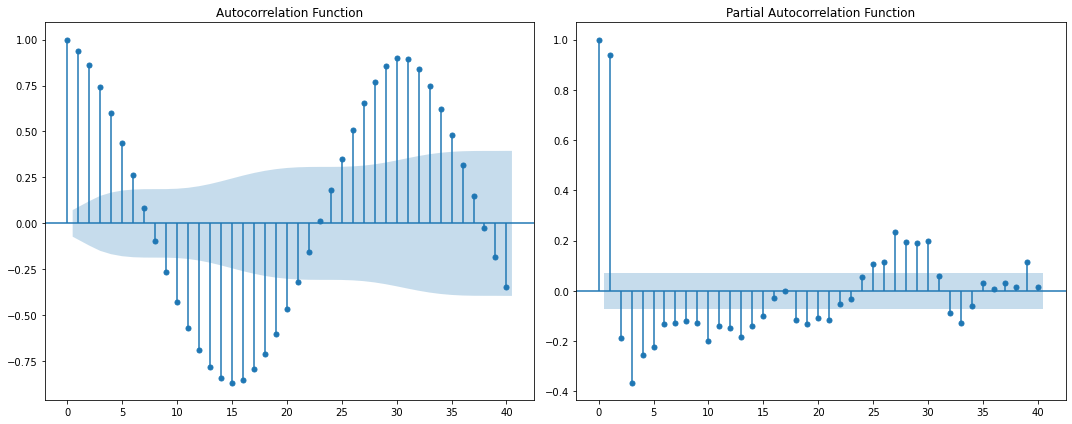

In [6]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    return dfoutput

stationarity_result = test_stationarity(daily_prices['daily_price'])
print(stationarity_result)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_acf(daily_prices['daily_price'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(1, 2, 2)
plot_pacf(daily_prices['daily_price'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

Stationarity after 1st Difference:
Test Statistic                -1.370598e+01
p-value                        1.263590e-25
#Lags Used                     2.000000e+01
Number of Observations Used    7.090000e+02
Critical Value (1%)           -3.439607e+00
Critical Value (5%)           -2.865625e+00
Critical Value (10%)          -2.568945e+00
dtype: float64


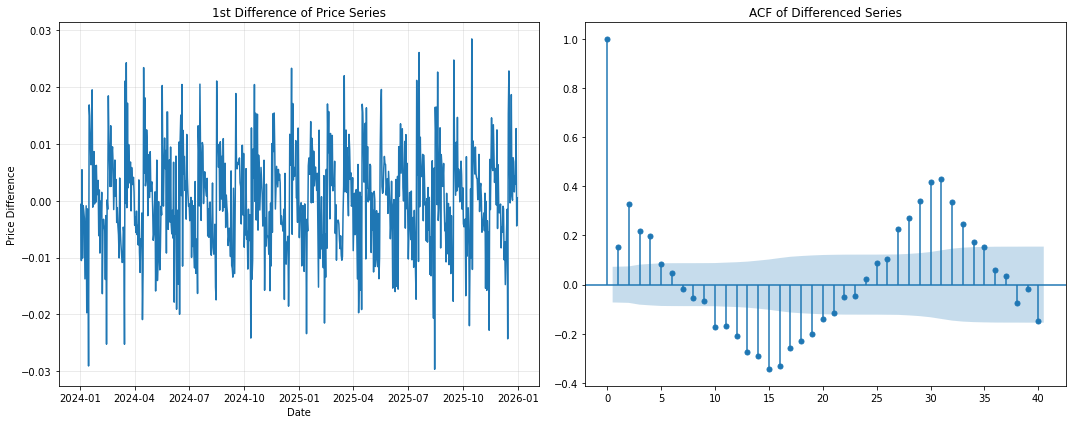

In [7]:
daily_prices['price_diff'] = daily_prices['daily_price'].diff().dropna()


print("Stationarity after 1st Difference:")
diff_stationarity = test_stationarity(daily_prices['price_diff'].dropna())
print(diff_stationarity)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(daily_prices.index[1:], daily_prices['price_diff'].dropna())
plt.title('1st Difference of Price Series')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plot_acf(daily_prices['price_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF of Differenced Series')

plt.tight_layout()
plt.show()

Train period: 2024-01-01 00:00:00 to 2025-08-06 00:00:00
Test period: 2025-08-07 00:00:00 to 2025-12-31 00:00:00
Train size: 584, Test size: 147


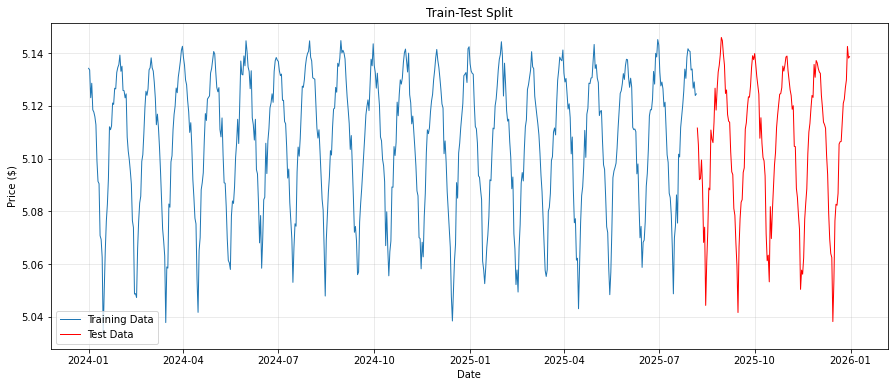

In [8]:

train_size = int(len(daily_prices) * 0.8)
train_data = daily_prices.iloc[:train_size]
test_data = daily_prices.iloc[train_size:]

print(f"Train period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Test period: {test_data.index.min()} to {test_data.index.max()}")
print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")


plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['daily_price'], label='Training Data', linewidth=1)
plt.plot(test_data.index, test_data['daily_price'], label='Test Data', linewidth=1, color='red')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Model Summary:
                               SARIMAX Results                                
Dep. Variable:            daily_price   No. Observations:                  584
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1964.355
Date:                Fri, 12 Sep 2025   AIC                          -3922.711
Time:                        15:26:27   BIC                          -3909.606
Sample:                    01-01-2024   HQIC                         -3917.603
                         - 08-06-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1129      0.033      3.407      0.001       0.048       0.178
ar.L2          0.3172      0.034      9.268      0.000       0.250       0.384
sigma2       6.93e-05   3.57e-06     

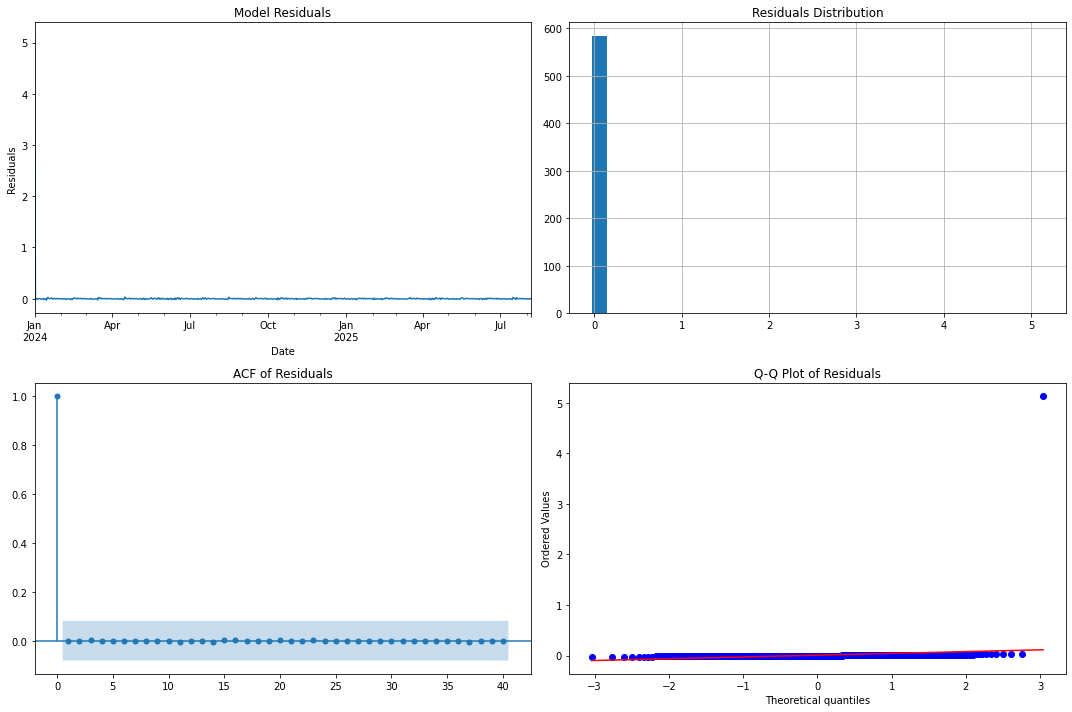

In [14]:
#Select initial parameters (p,d,q)
p, d, q = 2, 1, 0 

try:
    # Train ARIMA model
    model = ARIMA(train_data['daily_price'], order=(p, d, q))
    model_fit = model.fit()
    
    print("Model Summary:")
    print(model_fit.summary())
    
    #Model diagnostics
    print("\n Model Diagnostics:")
    residuals = model_fit.resid
    print(f"Residuals mean: {residuals.mean():.4f}")
    print(f"Residuals std: {residuals.std():.4f}")
    
    # Residual analysis
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    residuals.plot()
    plt.title('Model Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    
    plt.subplot(2, 2, 2)
    residuals.hist(bins=30)
    plt.title('Residuals Distribution')
    
    plt.subplot(2, 2, 3)
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title('ACF of Residuals')
    
    plt.subplot(2, 2, 4)
    from scipy.stats import probplot
    probplot(residuals, plot=plt)
    plt.title('Q-Q Plot of Residuals')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in model training: {e}")

In [15]:
# Make predictions
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


forecast_df = pd.DataFrame({
    'actual': test_data['daily_price'],
    'predicted': forecast_values,
    'lower_ci': confidence_intervals.iloc[:, 0],
    'upper_ci': confidence_intervals.iloc[:, 1]
}, index=test_data.index)

mae = mean_absolute_error(forecast_df['actual'], forecast_df['predicted'])
mse = mean_squared_error(forecast_df['actual'], forecast_df['predicted'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((forecast_df['actual'] - forecast_df['predicted']) / forecast_df['actual'])) * 100

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Model Performance Metrics:
Mean Absolute Error (MAE): $0.02
Mean Squared Error (MSE): $0.00
Root Mean Squared Error (RMSE): $0.03
Mean Absolute Percentage Error (MAPE): 0.48%


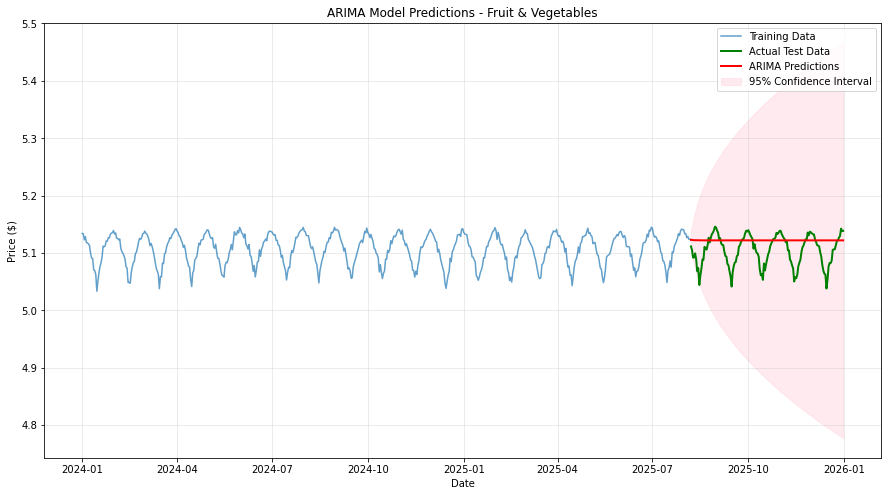

In [11]:
# Visualize the prediction results
plt.figure(figsize=(15, 8))

plt.plot(train_data.index, train_data['daily_price'], label='Training Data', alpha=0.7)
plt.plot(forecast_df.index, forecast_df['actual'], label='Actual Test Data', color='green', linewidth=2)
plt.plot(forecast_df.index, forecast_df['predicted'], label='ARIMA Predictions', color='red', linewidth=2)
plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title(f'ARIMA Model Predictions - {target_category}')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
print("Parameter Optimization")

# Try different parameter combinations
param_combinations = [
    (1, 1, 0),  # AR(1)
    (2, 1, 0),  # AR(2) 
    (3, 1, 0),  # AR(3)
    (0, 1, 1),  # MA(1)
    (1, 1, 1),  # ARMA(1,1)
    (2, 1, 1),  # ARMA(2,1)
]

results = []

for order in param_combinations:
    try:
        model = ARIMA(train_data['daily_price'], order=order)
        model_fit = model.fit()
        
        # prediction
        forecast = model_fit.get_forecast(steps=len(test_data))
        predicted = forecast.predicted_mean
        
        mae = mean_absolute_error(test_data['daily_price'], predicted)
        aic = model_fit.aic
        bic = model_fit.bic
        
        results.append({
            'order': order,
            'mae': mae,
            'aic': aic,
            'bic': bic
        })
        
        print(f"Order {order}: MAE=${mae:.2f}, AIC={aic:.1f}, BIC={bic:.1f}")
        
    except Exception as e:
        print(f"Error with order {order}: {e}")

results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['mae'].idxmin()]

print(f"\n Best Model: Order {best_model['order']}")
print(f"Best MAE: ${best_model['mae']:.2f}")
print(f"AIC: {best_model['aic']:.1f}")
print(f"BIC: {best_model['bic']:.1f}")

Parameter Optimization
Order (1, 1, 0): MAE=$0.03, AIC=-3863.0, BIC=-3854.3
Order (2, 1, 0): MAE=$0.02, AIC=-3922.7, BIC=-3909.6


/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_mo

Order (3, 1, 0): MAE=$0.02, AIC=-3935.4, BIC=-3917.9
Order (0, 1, 1): MAE=$0.03, AIC=-3856.8, BIC=-3848.1


/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_mo

Order (1, 1, 1): MAE=$0.02, AIC=-3898.3, BIC=-3885.2
Order (2, 1, 1): MAE=$0.02, AIC=-3930.2, BIC=-3912.7

 Best Model: Order (1, 1, 1)
Best MAE: $0.02
AIC: -3898.3
BIC: -3885.2


/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


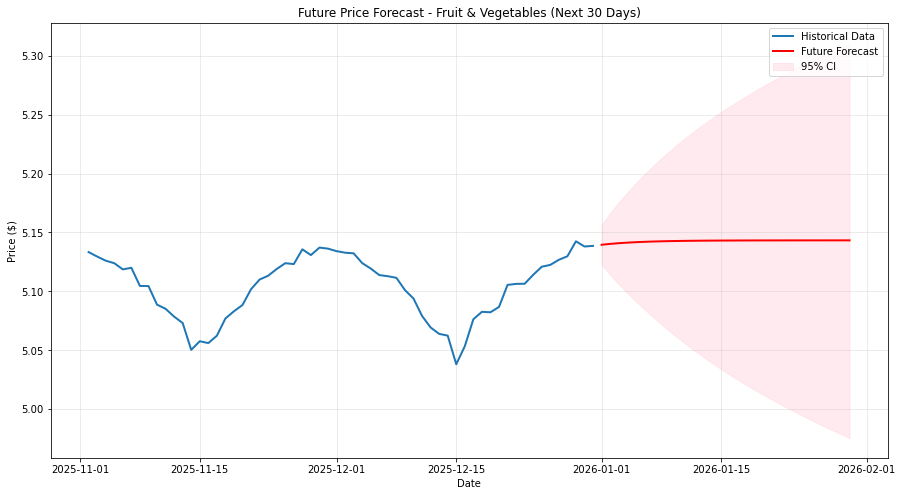

 ARIMA Model Training Completed!
Final model order: (1, 1, 1)
Model can predict prices for the next 30 days


In [18]:
# Retrain the model using the best parameters
best_order = best_model['order']
final_model = ARIMA(daily_prices['daily_price'], order=best_order)
final_model_fit = final_model.fit()

# Forecast for the next 30 days
future_steps = 30
future_forecast = final_model_fit.get_forecast(steps=future_steps)
future_dates = pd.date_range(start=daily_prices.index[-1] + pd.Timedelta(days=1), periods=future_steps)

future_df = pd.DataFrame({
    'predicted': future_forecast.predicted_mean,
    'lower_ci': future_forecast.conf_int().iloc[:, 0],
    'upper_ci': future_forecast.conf_int().iloc[:, 1]
}, index=future_dates)

# Visualize future predictions
plt.figure(figsize=(15, 8))

# Historical data
plt.plot(daily_prices.index[-60:], daily_prices['daily_price'][-60:], label='Historical Data', linewidth=2)

# Future Predictions
plt.plot(future_df.index, future_df['predicted'], label='Future Forecast', color='red', linewidth=2)
plt.fill_between(future_df.index, future_df['lower_ci'], future_df['upper_ci'], color='pink', alpha=0.3, label='95% CI')

plt.title(f'Future Price Forecast - {target_category} (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(" ARIMA Model Training Completed!")
print(f"Final model order: {best_order}")
print(f"Model can predict prices for the next {future_steps} days")